In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 데이터 전처리를 확인하자
- 대부분 캐글 높은 점수, 좋은 인사이트 주는 마스터들의 코드를 확인하고 공유
- 접근방법이나 로직을 이해하고 알아두자

In [2]:
train_df = pd.read_csv('train (3).csv')
test_df = pd.read_csv('test (4).csv')

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
traind_df = train_df.drop(['Ticket','Cabin'], axis = 1)
test_df = test_df.drop(['Ticket','Cabin'], axis = 1)
combine = [train_df,test_df]

combine

[     PassengerId  Survived  Pclass  \
 0              1         0       3   
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp  \
 0                              Braund, Mr. Owen Harris    male  22.0      1   
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

# 데이터 전처리 진행 시
- 문자형 데이터 : 우리가 알고있는 문자라는 뜻을 -> 인코딩하여 수치로 변환
- 숫자형 데이터 : 연속적인 숫자, (0,1,2)와 같은 이산
- 공통점 
    - (1)모든 문자열 데이터 등이 다 수치화 되어야 한다는 것!
    - (2)타겟값(y)을 기준으로 데이터의 분포를 봐야한단든 것!

In [5]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Name 전처리

In [6]:
for df in combine:
    df['Name_re'] = df.Name.str.extract('([A-Za-z]+)\.', expand=False)
# 정규표현식 문자열 전처리 시 원하는 문자만 추출
# 새로운 패턴 만들기, 패턴 찾기, 빈도 분석 시 많이 사용됨
# 문자열, 텍스트 분석 시 필수로 사용됨!

In [7]:
pd.crosstab(train_df['Name_re'],train_df['Sex'])

Sex,female,male
Name_re,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


- 데이터의 정보가 1개씩 매핑되는 것이 많은 경우
- 학습할 때 정답을 예측하기 더 어려운 문제가 생긴다.

In [8]:
for df in combine:
    df['Name_re'] = df['Name_re'].replace(['Lady','Countess','Capt',
                                          'Col','Don','Dr','Major',
                                          'Rev','Sir','Jonkheer','Dona'],
                                          'Rare')
# 확실하게 정보를 분류할 수 있는 값들은 제외하고, 나머지 작은 값들은 하나로 묶는다.

    df['Name_re'] = df['Name_re'].replace('Mlle','Miss')
    # 확실한 친구들은 남여 값으로 대체한다. 
    df['Name_re'] = df['Name_re'].replace('Ms','Miss')
    df['Name_re'] = df['Name_re'].replace('Mme','Mrs')

train_df[['Name_re','Survived']].groupby(['Name_re'],as_index = False).mean()
# 제작한 전처리 코드를 생존 컬럼과 묶어서 확인한다.

,Name_re,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


# 인코딩
- 사용할 값들을 수치로 바꿔주기!

In [9]:
name_re = {'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Rare':5}

for df in combine:
    df['Name_re'] = df['Name_re'].map(name_re)
    # name_re 딕셔너리의 키를 값으로 매핑한다.
    df['Name_re'] = df['Name_re'].fillna(0)
    # 결측치는 0으로 대체한다.

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_re
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,5
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


## 남성 여성 매핑

In [10]:
train_df = train_df.drop(['Name','PassengerId'],axis=1)
test_df = test_df.drop(['Name'],axis=1)
combine = [train_df,test_df]

In [11]:
for df in combine:
    df['Sex'] = df['Sex'].map({'female': 1, 'male': 0}).astype(int)
    
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_re
0,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,1,1,1,35.0,1,0,113803,53.1000,C123,S,3
4,0,3,0,35.0,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,211536,13.0000,NaN,S,5
887,1,1,1,19.0,0,0,112053,30.0000,B42,S,2
888,0,3,1,NaN,1,2,W./C. 6607,23.4500,NaN,S,2
889,1,1,0,26.0,0,0,111369,30.0000,C148,C,1


In [12]:
train_df = train_df.drop(['Ticket','Cabin'], axis = 1)

In [13]:
train_df.isna().sum()
# Age 컬럼에 결측치가 많다.

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Name_re       0
dtype: int64

# Age 컬럼 결측치 처리하기
- 전체 분포, 빈도와 같은 통계적 수치로 결측값을 대체
- Age컬럼과 타 컬럼들간의 관계를 보고 특성을 알아내서 결측치를 대체
- 'Pclass','Sex' 컬럼에서 Age 컬럼의 분포를 본다. 이 분포로 결측치를 대체
- 이 2개 컬럼을 선정한 이유가 필요하다.
- (수치적인) 컬럼들간의 관계, 도메인 지식은 필수적으로 생각해야 할 문제

In [14]:
import seaborn as sns

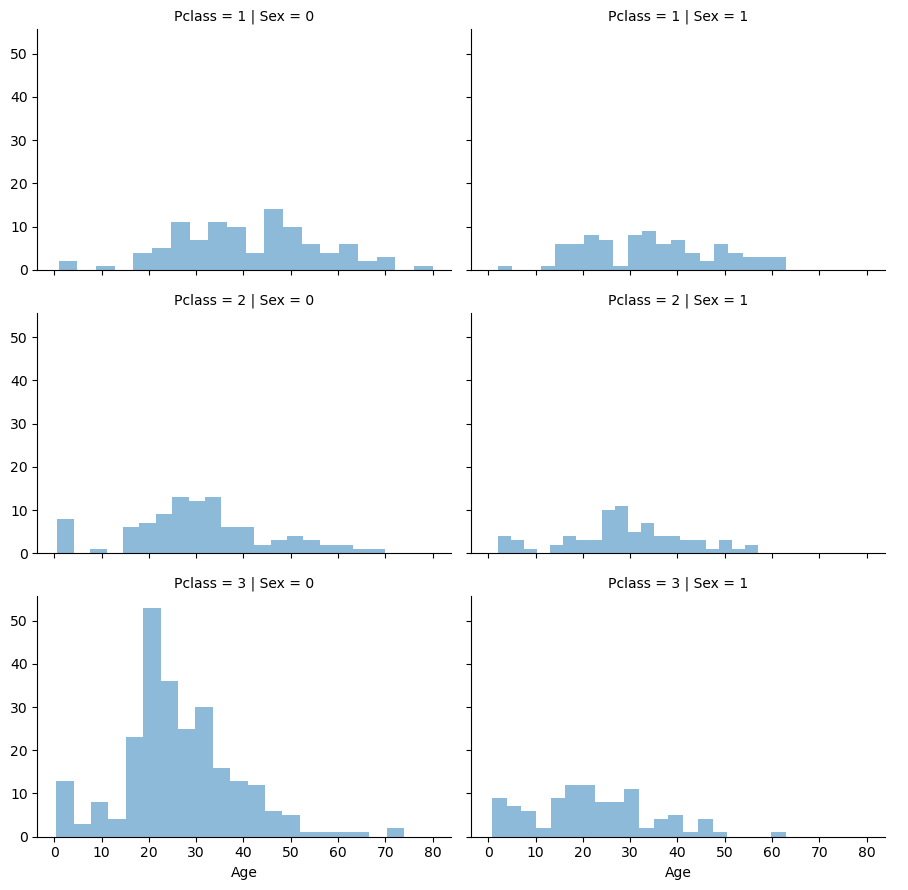

In [15]:
grid = sns.FacetGrid(train_df, row = 'Pclass',col = 'Sex', aspect = 1.5)
grid.map(plt.hist,'Age',alpha = .5, bins = 20)
grid.add_legend()

In [16]:
# 나이도 1실 ~ 80살. 일대일 대응이 많아지면 복잡해진다.
# 나이 자체도 범주화하여 5세 그룹, 10세 그룹 groupby를 진행한다.

In [17]:
# age를 guess하기 위한 배열 제작하기
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [18]:
for df in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = df[(df['Sex'] == i) & (df['Pclass'] == j+1)]['Age'].dropna()
            # Sex와 Pclass 값을 갖는 모든 행을 돌면서 해당 행의 Age값이 결측치라면 제거
            age_guess = guess_df.median()
            
            guess_ages[i,j] = int(age_guess/0.5 +0.5) * 0.5
            # 나이에 대한 범주화 기준을 중앙값으로 잡고 수식을 만들어서 넣음.
            
            
    for i in range(0,2):
        for j in range(0,3):
            df.loc[(df.Age.isnull()) & (df.Sex == i) & (df.Pclass == j+1),'Age'] = guess_ages[i,j]
            # null 값들에 위에서 잡은 Age들을 대입
    
    df['Age'] = df['Age'].astype(int)

In [19]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Name_re        0
dtype: int64

# 나이 범주화한 결과 살펴보기

In [20]:
test_df['Agerange'] = pd.cut(train_df['Age'],5)

In [21]:
test_df[['Agerange','Fare']].groupby(['Agerange'], as_index=False).mean().sort_values(by='Agerange', ascending=True)

,Agerange,Fare
0,"(0.34, 16.336]",42.804834
1,"(16.336, 32.252]",38.238897
2,"(32.252, 48.168]",32.338220
3,"(48.168, 64.084]",25.056336
4,"(64.084, 80.0]",26.595840


In [22]:
test_df.isna().sum()
# age missing value이 전처리를 하니까 사라짐.

PassengerId     0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            1
Embarked        0
Name_re         0
Agerange       83
dtype: int64

# Age 인코딩 진행

In [23]:
for df in combine:
    df.loc[df['Age'] <= 16, 'Age'] = 0
    df.loc[(df['Age'] > 16) & (df['Age'] <= 32), 'Age'] = 1
    df.loc[(df['Age'] > 32) & (df['Age'] <= 48), 'Age'] = 2
    df.loc[(df['Age'] > 48) & (df['Age'] <= 64), 'Age'] = 3
    df.loc[df['Age'] > 64, 'Age'] = 4
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re,Agerange
0,892,3,0,2,0,0,7.8292,Q,1,"(16.336, 32.252]"
1,893,3,1,2,1,0,7.0000,S,3,"(32.252, 48.168]"
2,894,2,0,3,0,0,9.6875,Q,1,"(16.336, 32.252]"
3,895,3,0,1,0,0,8.6625,S,1,"(32.252, 48.168]"
4,896,3,1,1,1,1,12.2875,S,3,"(32.252, 48.168]"


In [24]:
test_df.Age.value_counts()

Age
1    257
2     88
3     37
0     34
4      2
Name: count, dtype: int64

In [25]:
test_df = test_df.drop(['Agerange'],axis=1)
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_re
0,892,3,0,2,0,0,7.8292,Q,1
1,893,3,1,2,1,0,7.0000,S,3
2,894,2,0,3,0,0,9.6875,Q,1
3,895,3,0,1,0,0,8.6625,S,1
4,896,3,1,1,1,1,12.2875,S,3
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,1,0,0,8.0500,S,1
414,1306,1,1,2,0,0,108.9000,C,5
415,1307,3,0,2,0,0,7.2500,S,1
416,1308,3,0,1,0,0,8.0500,S,1
